# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Capstone Project-5 (Hand_Written_Digits)</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |

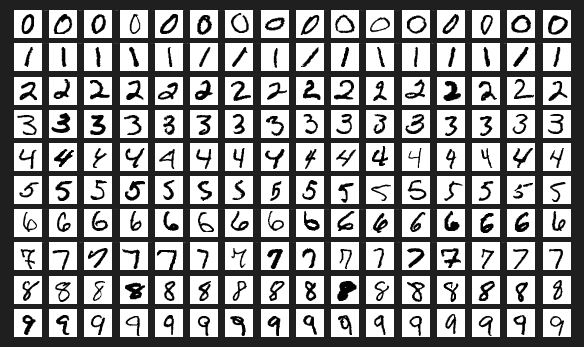

# Hand Written Digits Project

Digit database was created by collecting 250 samples from 44 writers. These writers are asked to write 250 digits from 0-9 in random order inside boxes of 500 by 500 tablet pixel resolution. The digit dataset then is so transformed that each digit is a unique vector of 16 dimensions.

# Exploratory Data Analysis and Visualization

In [1]:
# EDA için kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

# Grafikleri göstermek için
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

# Makine öğrenmesi algoritmaları, veri ön işleme ve değerlendirme için sklearn kütüphanesi
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, auc

# Uyarılardan kurtulmak için
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

C:\Users\Master\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [2]:
data = pd.read_csv("pendigits_txt.csv")

In [3]:
df = data.copy()

In [4]:
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [5]:
df.shape

(10992, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [11]:
df["class"].value_counts().sort_index(ascending=True)

class
0    1143
1    1143
2    1144
3    1055
4    1144
5    1055
6    1056
7    1142
8    1055
9    1055
Name: count, dtype: int64

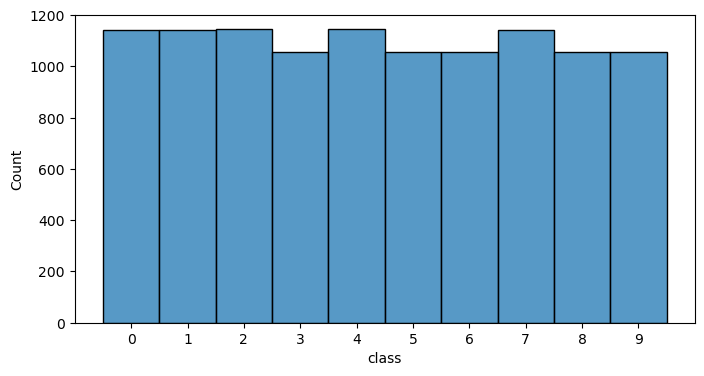

In [16]:
plt.figure (figsize=(8,4))
sns.histplot(data=df,x="class",discrete=True)
plt.xticks(np.arange(0,10));

- The classes in the dataset are almost distributed uniformly so we can say that dataset is balanced

In [50]:
target_corr = df.corr()['class'].drop('class').sort_values(ascending=True)
target_corr

input9    -0.170221
input12   -0.123672
input7    -0.123090
input15   -0.071037
input10   -0.044632
input14   -0.036312
input11   -0.011499
input5     0.039919
input16    0.085062
input13    0.089234
input8     0.108829
input6     0.153520
input4     0.183646
input2     0.232075
input3     0.243030
input1     0.352199
Name: class, dtype: float64

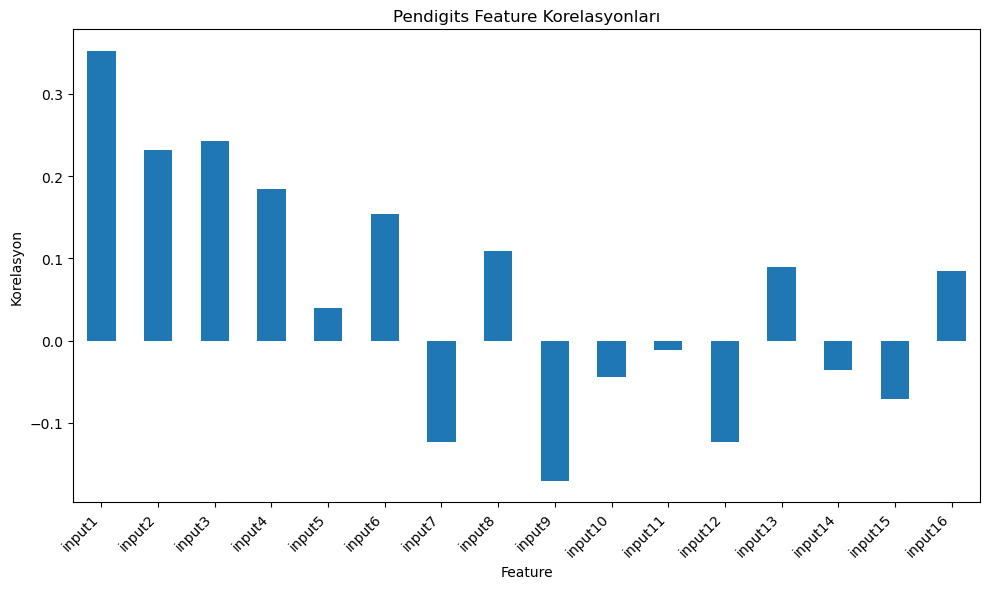

In [53]:
target_corr = df.corr()['class'].drop('class')

# Grafik çizimi
plt.figure(figsize=(10,6))
correlations.plot(kind='bar')
plt.title('Pendigits Feature Korelasyonları')
plt.xlabel('Feature')
plt.ylabel('Korelasyon')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

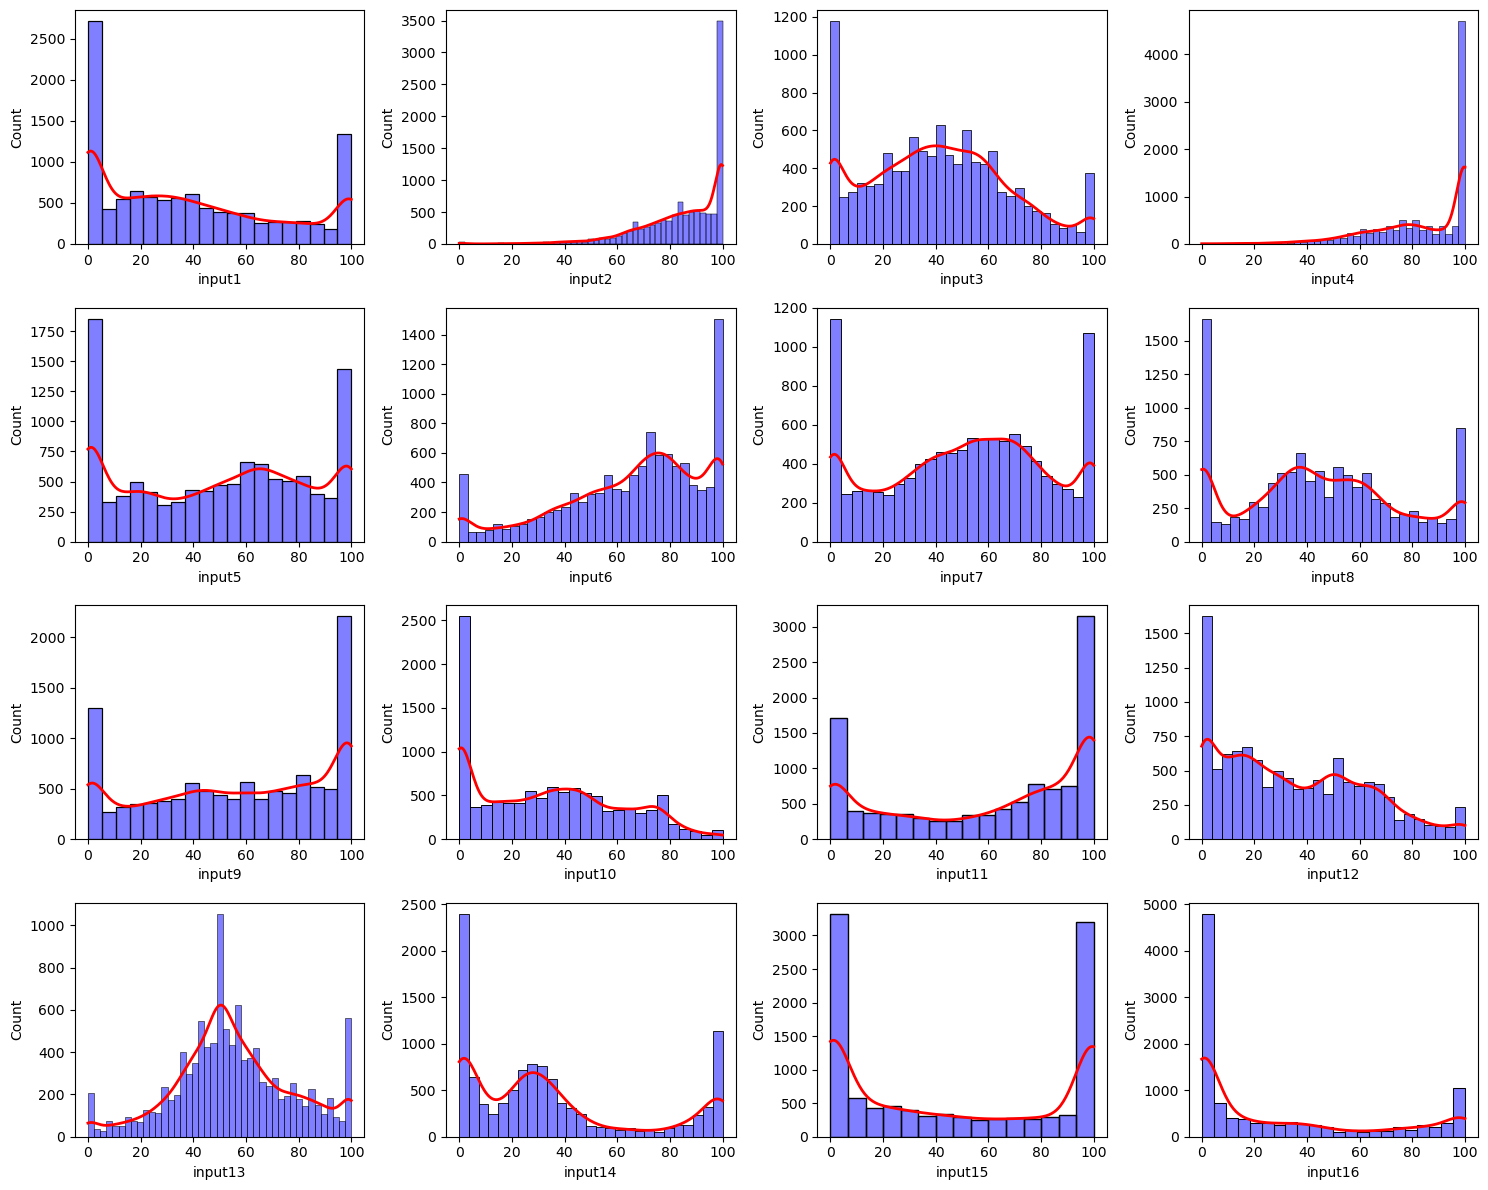

In [43]:
cols= list(df.columns)
fig, ax = plt.subplots(4,4,figsize=(15,12))
index= 0
for i in range(4):
    for j in range(4):
        ax1=sns.histplot(df[cols[index]], ax=ax[i,j], color = "b", kde=True,line_kws={"lw":2})
        ax1.lines[0].set_color('red')
        index+=1
plt.tight_layout()
plt.show()

## Train-Test Split

In [9]:
X = df.drop("class",axis=1)
y = df["class"]

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [8]:
print("X_train :   ",X_train.shape[0])
print("X_test  :   ",X_test.shape[0])
print("y_train :   ",y_train.shape)
print("y_test  :   ",y_test.shape)

X_train :    9892
X_test  :    1100
y_train :    (9892,)
y_test  :    (1100,)


# Support Vector Machine (SVM) Classifier

In [9]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [7]:
scaler = StandardScaler()

In [13]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(random_state = 42))]
pipe_model = Pipeline(steps=operations)

In [14]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[113   0   0   0   0   0   1   0   0   0]
 [  0 121   0   0   0   0   0   1   0   0]
 [  0   1 101   0   0   0   0   0   0   0]
 [  0   0   0  91   0   0   0   0   0   0]
 [  0   0   0   0 126   0   0   0   0   0]
 [  0   0   0   0   0 106   0   0   0   0]
 [  0   0   0   0   0   0 116   0   0   0]
 [  0   1   0   0   0   0   0 124   0   0]
 [  0   0   0   0   0   0   0   0  98   0]
 [  0   0   0   0   0   0   0   0   0 100]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       114
           1       0.98      0.99      0.99       122
           2       1.00      0.99      1.00       102
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00       126
           5       1.00      1.00      1.00       106
           6       0.99      1.00      1.00       116
           7       0.99      0.99      0.99       125
           8       1.00      1.00      1.00        98
           9       

In [15]:
SVM_predict = pipe_model.predict(X_test)
SVM_predict

array([7, 5, 2, ..., 8, 8, 8], dtype=int64)

## GridSearchCV with SVM

In [66]:
pipe_model.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('SVC', SVC(random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'SVC': SVC(random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'SVC__C': 1.0,
 'SVC__break_ties': False,
 'SVC__cache_size': 200,
 'SVC__class_weight': None,
 'SVC__coef0': 0.0,
 'SVC__decision_function_shape': 'ovr',
 'SVC__degree': 3,
 'SVC__gamma': 'scale',
 'SVC__kernel': 'rbf',
 'SVC__max_iter': -1,
 'SVC__probability': False,
 'SVC__random_state': 42,
 'SVC__shrinking': True,
 'SVC__tol': 0.001,
 'SVC__verbose': False}

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {'SVC__C':[0.01,0.1,0,3,1],
              'SVC__kernel':['linear','rbf'],
              'SVC__gamma':["scale", "auto", 0.1, 1],
              'SVC__degree':[1,2]}
grid = GridSearchCV(estimator=pipe_model,param_grid=param_grid,cv=5,scoring="accuracy",return_train_score=True,n_jobs=-1)



In [19]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.01, 0.1, 0, 3, 1], 'SVC__degree': [1, 2],
                         'SVC__gamma': ['scale', 'auto', 0.1, 1],
                         'SVC__kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='accuracy')

In [20]:
grid.best_score_

0.9955519813450738

In [25]:
grid.scoring

'accuracy'

In [21]:
y_pred_svm = grid.predict(X_test)
y_pred_svm

array([7, 5, 2, ..., 8, 8, 8], dtype=int64)

In [22]:
grid.best_params_

{'SVC__C': 3, 'SVC__degree': 1, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'}

# Decision Tree (DT) Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dtm = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)
dtm

DecisionTreeClassifier(random_state=42)

In [29]:
eval_metric(dtm,X_train,y_train,X_test,y_test)

Test_Set
[[112   0   0   0   0   0   1   0   1   0]
 [  0 111   3   1   2   0   1   1   0   3]
 [  0   4  97   0   0   0   0   1   0   0]
 [  0   0   1  86   0   3   0   0   0   1]
 [  0   1   0   0 123   0   0   0   0   2]
 [  0   0   0   1   0 104   1   0   0   0]
 [  0   0   1   0   0   0 114   0   1   0]
 [  0   3   1   1   0   1   1 116   2   0]
 [  2   1   0   0   0   1   0   0  94   0]
 [  0   0   0   0   1   1   0   0   0  98]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       114
           1       0.93      0.91      0.92       122
           2       0.94      0.95      0.95       102
           3       0.97      0.95      0.96        91
           4       0.98      0.98      0.98       126
           5       0.95      0.98      0.96       106
           6       0.97      0.98      0.97       116
           7       0.98      0.93      0.95       125
           8       0.96      0.96      0.96        98
           9       

## Grid SearchCV with Decision Tree 

In [23]:
dtm.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [30]:
param_grid = {"splitter":["best","random"],
              "criterion": ["gini", "entropy"],
              "max_features":[None, "auto", "log2", 2, 3, 4,5,6, 7],
    "max_depth": [None, 2, 3, 4],
    "min_samples_leaf": [1, 10, 100, 500],
    "min_samples_split": [10, 20,200,1000],
}

In [31]:
dt_model = DecisionTreeClassifier(random_state=42)

In [32]:
grid_dt = GridSearchCV(estimator=dt_model,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True)


In [33]:
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 10, 100, 500],
                         'min_samples_split': [10, 20, 200, 1000],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy')

In [34]:
grid_dt.best_score_

0.9539017622345037

In [35]:
eval_metric(grid_dt,X_train,y_train,X_test,y_test)

Test_Set
[[114   0   0   0   0   0   0   0   0   0]
 [  0 111   7   1   0   0   0   2   0   1]
 [  0   1  97   1   0   0   1   2   0   0]
 [  0   1   0  86   0   3   0   0   0   1]
 [  0   0   0   0 125   0   0   0   0   1]
 [  0   0   0   3   0 101   0   0   0   2]
 [  1   0   1   0   1   0 111   2   0   0]
 [  0   1   1   1   0   1   0 119   1   1]
 [  2   0   1   0   0   1   1   0  93   0]
 [  0   1   0   0   0   3   0   1   0  95]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       114
           1       0.97      0.91      0.94       122
           2       0.91      0.95      0.93       102
           3       0.93      0.95      0.94        91
           4       0.99      0.99      0.99       126
           5       0.93      0.95      0.94       106
           6       0.98      0.96      0.97       116
           7       0.94      0.95      0.95       125
           8       0.99      0.95      0.97        98
           9       

In [36]:
grid_dt.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'best'}

In [37]:
param_grid = {"splitter":["best","random"],
              "criterion": ["gini", "entropy"],
              "max_features":[None, "auto", "log2", 2, 3, 4,5,6, 7],
    "max_depth": [None, 2, 3, 4],
    "min_samples_leaf": [1, 2,5,6],
    "min_samples_split": [2,5,7,8,10]}

In [38]:
grid_dt = GridSearchCV(estimator=dt_model,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True)

In [39]:
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 5, 6],
                         'min_samples_split': [2, 5, 7, 8, 10],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy')

In [40]:
grid_dt.best_score_

0.9597658630994502

In [41]:
grid_dt.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'random'}

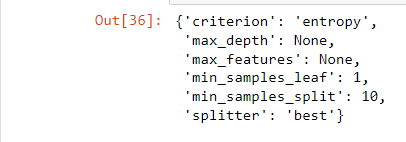

In [42]:
y_pred_dt = grid_dt.predict(X_test)
y_pred_dt

array([7, 5, 2, ..., 8, 8, 8], dtype=int64)

# Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf_model = RandomForestClassifier(random_state=42)

In [43]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [46]:
eval_metric(rf_model,X_train,y_train,X_test,y_test)

Test_Set
[[114   0   0   0   0   0   0   0   0   0]
 [  0 121   1   0   0   0   0   0   0   0]
 [  0   1 101   0   0   0   0   0   0   0]
 [  0   0   0  91   0   0   0   0   0   0]
 [  0   0   0   0 126   0   0   0   0   0]
 [  0   0   0   0   0 106   0   0   0   0]
 [  0   0   0   0   1   0 115   0   0   0]
 [  0   1   0   0   0   0   1 123   0   0]
 [  0   0   0   0   0   0   0   0  98   0]
 [  0   0   0   0   1   0   0   0   0  99]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       0.98      0.99      0.99       122
           2       0.99      0.99      0.99       102
           3       1.00      1.00      1.00        91
           4       0.98      1.00      0.99       126
           5       1.00      1.00      1.00       106
           6       0.99      0.99      0.99       116
           7       1.00      0.98      0.99       125
           8       1.00      1.00      1.00        98
           9       

## GridSearchCV with RandomForest

In [48]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [67]:
help(rf_model)

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  For a comparison between tree-based ensemble models see the example
 |  :ref:`s

In [66]:
rf_model=RandomForestClassifier()

In [69]:
param_grid = {"criterion":["gini","entropy","log_loss"], 
              "n_estimators":[64, 128, 250, 500],
              "max_depth": [1, 2, 3],
              "min_samples_leaf": [1, 2, 3],
              "min_samples_split": [2, 3, 4],
              "max_features":['auto', X.shape[1]/3, 6]}  # Total number of features/3 is advised by Breiman 

In [70]:
grid_model = GridSearchCV(estimator=rf_model,
                          param_grid=param_grid,
                          scoring='accuracy',
                          cv=5,
                          n_jobs = -1,
                          return_train_score=True)

In [71]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3],
                         'max_features': ['auto', 5.333333333333333, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [64, 128, 250, 500]},
             return_train_score=True, scoring='accuracy')

In [72]:
grid_model.best_score_

0.8048920643500945

In [73]:
grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 64}

In [84]:
grid_model.scoring

'accuracy'

In [87]:
grid_model.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [88]:
grid_model.best_index_

304

In [92]:
grid_model.best_estimator_

RandomForestClassifier(max_depth=3, max_features=6, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=64)

In [74]:
y_pred = grid_model.predict(X_test)

In [75]:
y_pred

array([7, 5, 2, ..., 8, 8, 8], dtype=int64)

In [76]:
y_pred_proba = grid_model.predict_proba(X_test)
y_pred_proba

array([[0.0111585 , 0.05230479, 0.0990166 , ..., 0.46434854, 0.09662242,
        0.01610669],
       [0.03631808, 0.00578342, 0.00205612, ..., 0.03090585, 0.18511503,
        0.00724264],
       [0.00289436, 0.24519542, 0.4556015 , ..., 0.097521  , 0.01756248,
        0.05007927],
       ...,
       [0.10624903, 0.01165116, 0.01419243, ..., 0.06954643, 0.57957614,
        0.00984317],
       [0.10929785, 0.01163814, 0.0128679 , ..., 0.05943166, 0.5652896 ,
        0.00980493],
       [0.28482836, 0.01499539, 0.00111674, ..., 0.01064196, 0.53528057,
        0.01637185]])

In [46]:
rf_model = RandomForestClassifier(criterion= 'gini',
 max_depth= 3,
 max_features = 6,
 min_samples_leaf = 2,
 min_samples_split= 3,
 n_estimators = 64 ,random_state=42)  # yukarıdaki fonk kullanbilmek için best param ile tekrar model oluşturdum

rf_model

RandomForestClassifier(max_depth=3, max_features=6, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=64, random_state=42)

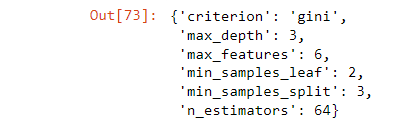

In [47]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=6, min_samples_leaf=2,
                       min_samples_split=3, n_estimators=64, random_state=42)

In [50]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([7, 5, 2, ..., 8, 8, 8], dtype=int64)

In [57]:
comp_pred_df = pd.DataFrame({
    "y_pred_svm": y_pred_svm,
    "y_pred_dt": y_pred_dt,
    "y_pred_rf": y_pred_rf,
    "y_test": y_test
})

In [59]:
comp_pred_df.sample(20)

,y_pred_svm,y_pred_dt,y_pred_rf,y_test
5668,3,3,3,3
7014,8,8,8,8
7444,1,1,1,1
7550,1,1,2,1
4970,2,2,2,2
9146,2,2,2,2
3227,2,2,2,2
4532,2,2,2,2
4845,1,1,2,1
4101,7,7,7,7


In [73]:
print(f"SVM accuracy:{round(grid.best_score_,3)}")
print(f"DT  accuracy:{round(grid_dt.best_score_,3)}")
print(f"RF  accuracy:{round(rf_model.score(X_train,y_train),3)}")
print("diğer 3 modele kıyasla RandomForest en kötü tahmin ve skorları aldık")

SVM accuracy:0.996
DT  accuracy:0.96
RF  accuracy:0.799
diğer 3 modele kıyasla RandomForest en kötü tahmin ve skorları aldık


In [66]:
rf_model.score(X_train,y_train)

0.7988273352203801

In [60]:
from sklearn.tree import plot_tree 

def report_model(model, number_of_tree):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model["rf_model"].estimators_[number_of_tree], feature_names=X.columns, 
          class_names=df["class"].unique().tolist(),
          filled = True,
          fontsize = 8);

# model["RF_model"].estimators_[number_of_tree] kodu ile agaç numarasını (number_of_tree) vererek istediğimiz agacı
# görselleştirebiliyoruz.#features_names=X.columns

In [61]:
report_model(rf_model,304)



Test Set
[[113   0   0   0   0   0   0   0   1   0]
 [  0  62  44  12   1   0   3   0   0   0]
 [  0   0  98   1   0   0   1   2   0   0]
 [  0   0   1  89   0   0   0   0   0   1]
 [  0   1   0   0 125   0   0   0   0   0]
 [  0   0   0  24   2  67   6   0   0   7]
 [  1   0   0   1   3   0 105   6   0   0]
 [  0  12   3   2   6   0   0  98   3   1]
 [  2   0   0   0   0   0   1   6  89   0]
 [  4  12   0  34  20   0   1   0   0  29]]


              precision    recall  f1-score   support

           0       0.94      0.99      0.97       114
           1       0.71      0.51      0.59       122
           2       0.67      0.96      0.79       102
           3       0.55      0.98      0.70        91
           4       0.80      0.99      0.88       126
           5       1.00      0.63      0.77       106
           6       0.90      0.91      0.90       116
           7       0.88      0.78      0.83       125
           8       0.96      0.91      0.93        98
           9   

TypeError: list indices must be integers or slices, not str

<Figure size 1200x800 with 0 Axes>

In [80]:
predict = pd.DataFrame(y_pred_proba)

In [81]:
predict.insert(10,value=y_pred,column="y_pred")

In [83]:
predict.head()

,0,1,2,3,4,5,6,7,8,9,y_pred
0,0.011159,0.052305,0.099017,0.014166,0.029804,0.024867,0.191605,0.464349,0.096622,0.016107,7
1,0.036318,0.005783,0.002056,0.000154,0.013965,0.709439,0.009021,0.030906,0.185115,0.007243,5
2,0.002894,0.245195,0.455602,0.081026,0.011751,0.026436,0.011933,0.097521,0.017562,0.050079,2
3,0.004148,0.145322,0.068648,0.349744,0.025832,0.108786,0.023330,0.053966,0.019190,0.201034,3
4,0.021525,0.051248,0.006500,0.016929,0.646620,0.026677,0.079889,0.024078,0.008377,0.118156,4


# Choose the Best Model

Aşağıdaki kodu düzenlemen gerek metricleri ataanan değişkenler isimi doğru değil yukarda tanımladığın değişkenleri yaz

In [74]:
from sklearn.metrics import make_scorer,accuracy_score,f1_score,

In [79]:
svc_f1 = f1_score(y_test,y_pred_svm,average="macro")
dt_f1 =  f1_score(y_test,y_pred_dt,average="macro")
rf_f1 = f1_score(y_test,y_pred_rf,average="macro")
svc_accuracy = accuracy_score(y_test,y_pred_svm)
dt_accuracy =  accuracy_score(y_test,y_pred_dt)
rf_accuracy =  accuracy_score(y_test,y_pred_rf)

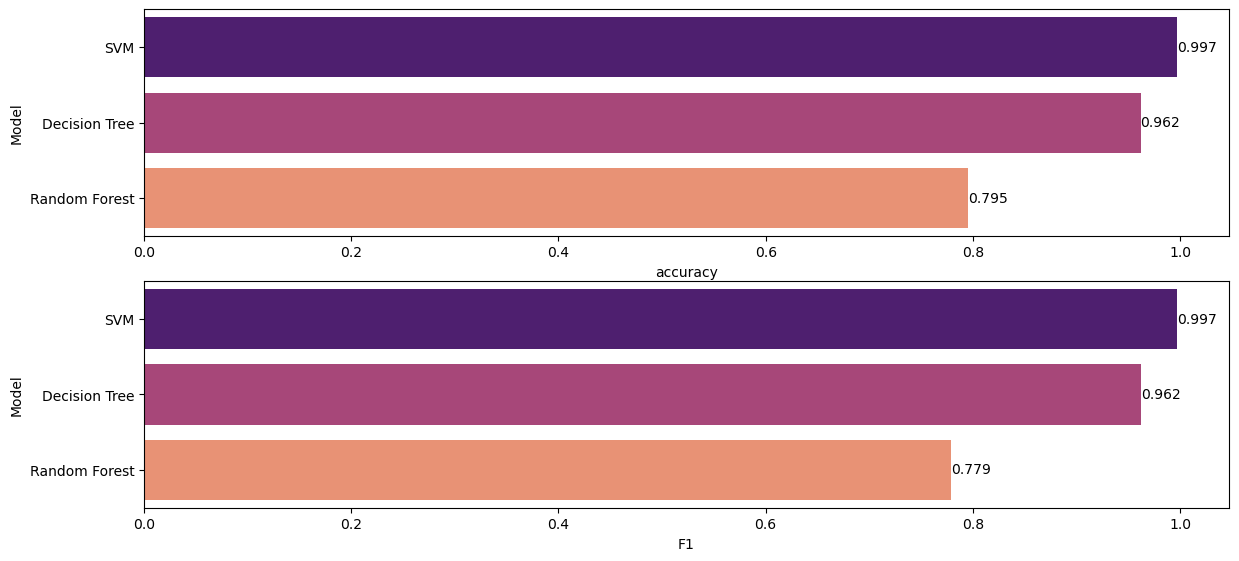

In [81]:
compare = pd.DataFrame({"Model": ["SVM", "Decision Tree", "Random Forest"],
                        "F1": [svc_f1, dt_f1, rf_f1],
                        "accuracy": [svc_accuracy, dt_accuracy, rf_accuracy],})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="accuracy", ascending=False)
ax=sns.barplot(x="accuracy", y="Model", data=compare, palette="magma")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="magma")
labels(ax)

'SVC__C': 3, 'SVC__degree': 1, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'

In [20]:
operations = [('Scaler', scaler), ('svc', SVC(random_state=42, C= 3,degree=1,probability=True, gamma = 'scale', kernel = 'rbf'))]
svc = Pipeline(steps=operations)

svc.fit (X,y)


Pipeline(steps=[('Scaler', StandardScaler()),
                ('svc', SVC(C=3, degree=1, probability=True, random_state=42))])

In [13]:
data_to_pred = df.loc[[5249]].drop("class",axis=1)
data_to_pred

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16
5249,0,92,44,100,91,93,100,56,85,18,61,0,40,27,86,35


In [27]:
y_actual = df.loc[[5249]]["class"].values
y_actual

array([7], dtype=int64)

In [24]:
y_pred_fnl_m = svc.predict(data_to_pred)
y_pred_fnl_m

array([7], dtype=int64)

In [25]:
pred_proba = svc.predict_proba(data_to_pred)
pred_proba

array([[7.50082855e-05, 3.70728081e-05, 5.60088108e-05, 1.75684483e-04,
        2.77153998e-05, 7.41926272e-05, 1.35565560e-04, 9.99062325e-01,
        1.42089808e-04, 2.14336875e-04]])

In [31]:
classes_proba=pd.DataFrame(pred_proba,columns=np.arange(0,10))
classes_proba

,0,1,2,3,4,5,6,7,8,9
0,0.000075,0.000037,0.000056,0.000176,0.000028,0.000074,0.000136,0.999062,0.000142,0.000214


In [32]:
df_compare = pd.DataFrame({"y_pred":y_pred_fnl_m,"y_actual":y_actual})

In [39]:
pd.concat(objs=[classes_proba,df_compare],axis=1)

,0,1,2,3,4,5,6,7,8,9,y_pred,y_actual
0,0.000075,0.000037,0.000056,0.000176,0.000028,0.000074,0.000136,0.999062,0.000142,0.000214,7,7


# Conclusion :

<span style="font-size:18px;"> ***According to scores achieved above let's choose*** </span> <span style="color:red;font-size:18px">***SVM(with GridSearchCV)***</span> <span style="font-size:18px;"> ***as the best model Notebook***</span>

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Congratulations</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |